In [15]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from fastai.vision.all import *

In [2]:
df = pd.read_csv('/kaggle/input/medical-dataset/Final Data/processed_image_labels.csv')
df.head()

,Eye ID,Label
0,TRAIN000000,NRG
1,TRAIN000001,NRG
2,TRAIN000002,NRG
3,TRAIN000003,NRG
4,TRAIN000004,NRG


In [3]:


# Path to where your images are stored
path = Path('/kaggle/input/medical-dataset/Final Data/Final_RG_NRG')  # Update this path to your images directory

# Load the CSV file
df = pd.read_csv('/kaggle/input/medical-dataset/Final Data/processed_image_labels.csv')  # Update the path to your CSV file

# Assuming 'Eye ID' needs to be appended with '.jpg' to form the full image filename
df['image_path'] = df['Eye ID'].apply(lambda x: f"{x}.JPG")

# Setup ImageDataLoaders
dls = ImageDataLoaders.from_df(df, 
                               path=path, 
                               fn_col='image_path', 
                               label_col='Label', 
                               valid_pct=0.2, 
                               seed=42, 
                               suff='', 
                               item_tfms=Resize(224))

# Show a batch of images to verify


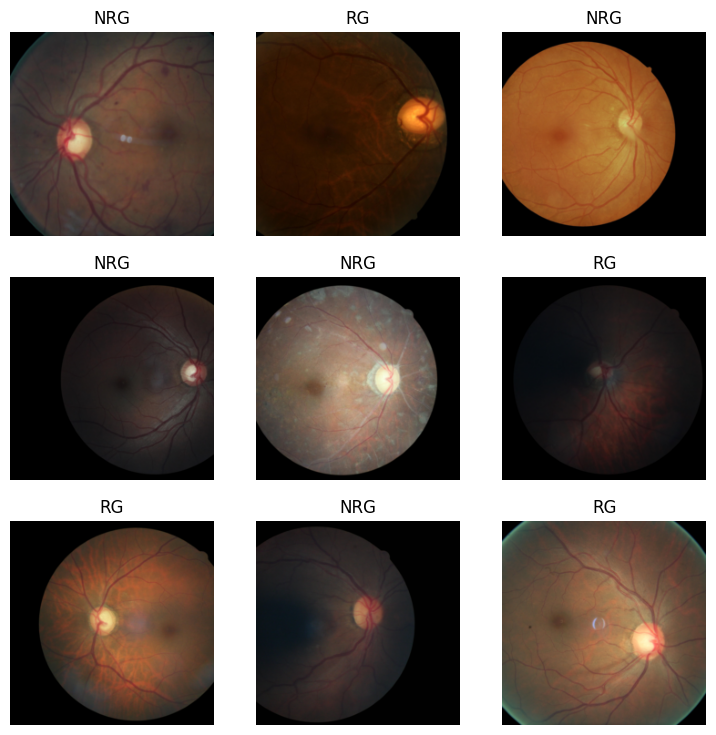

In [4]:
dls.show_batch()

In [15]:
learn = vision_learner(dls, "convnext_tiny.in12k_ft_in1k_384", metrics=[error_rate,accuracy])
learn.fine_tune(1)

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.971645,0.709559,0.297500,0.702500,02:07


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.691891,0.665555,0.230000,0.770000,02:13


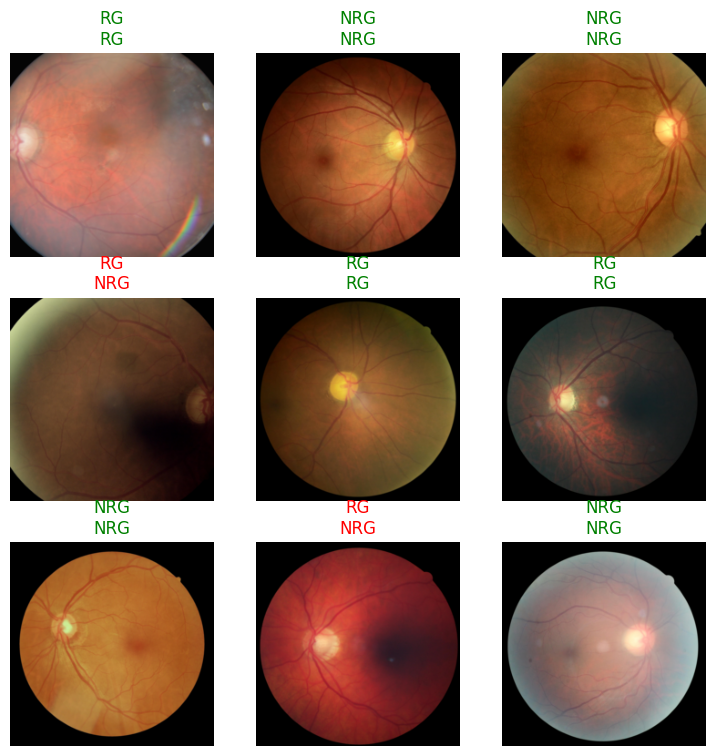

In [16]:
learn.show_results()

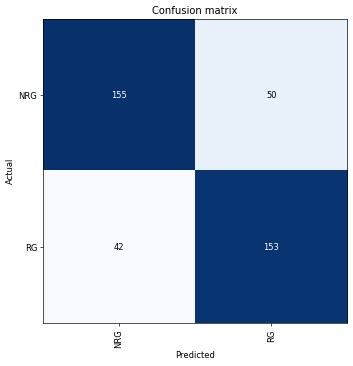

In [17]:
ClassificationInterpretation.from_learner(learn).plot_confusion_matrix(figsize=(6,6), dpi=60)

In [72]:
condition_df = pd.read_csv("/kaggle/input/final-condition-dataset/Final Conditions Data/Refined_Filtered_Conditions.csv")

In [73]:
condition_df.head()

,Eye ID,Conditions
0,TRAIN000034,ANRI
1,TRAIN000060,ANRS ANRI
2,TRAIN000068,ANRS ANRI BCLVS NVT LC
3,TRAIN000100,ANRS ANRI LD LC
4,TRAIN000106,ANRS ANRI


In [74]:


# Path to where your images are stored
path = Path('/kaggle/input/final-condition-dataset/Final Conditions Data/Final_conditions')  # Update this path to your images directory

# Load the CSV file
df = pd.read_csv('/kaggle/input/csv-with-conditions/Refined_Filtered_Conditions_Copied_Only.csv')  # Update the path to your CSV file

# Assuming 'Eye ID' needs to be appended with '.jpg' to form the full image filename
df['image_path'] = df['Eye ID'].apply(lambda x: f"{x}.JPG")

# Setup ImageDataLoaders
dls = ImageDataLoaders.from_df(df, 
                               path=path, 
                               fn_col='image_path', 
                               label_col='Conditions', 
                               valid_pct=0.2, 
                               seed=42, 
                               label_delim=' ',
                               suff='', 
                               item_tfms=Resize(224))

# Show a batch of images to verify


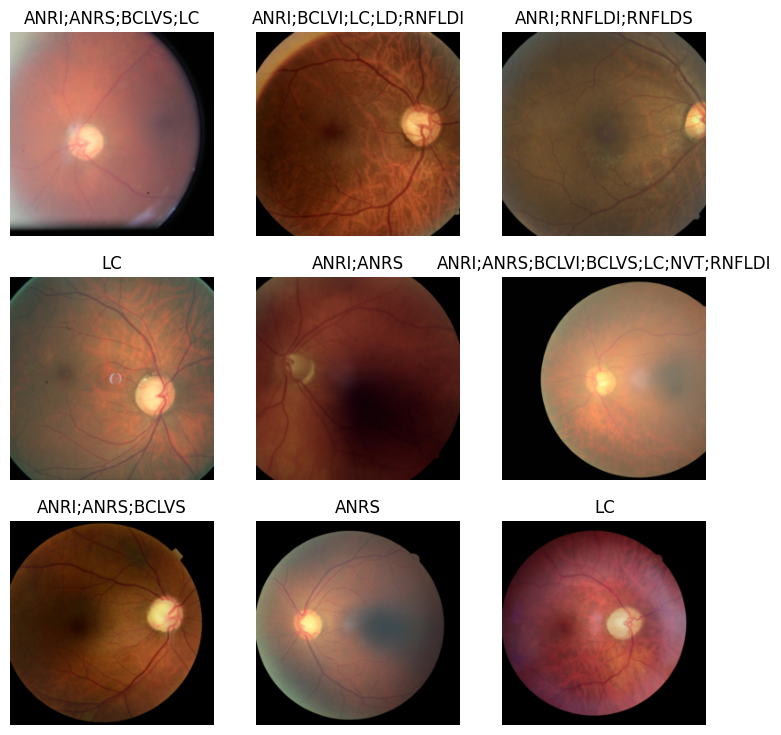

In [58]:
dls.show_batch()

In [59]:
learn = vision_learner(dls, "resnet50", metrics=[partial(accuracy_multi, thresh=0.5)])

In [61]:
learn.fine_tune(2, 3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.993141,0.739461,0.618367,00:53


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.557618,0.454246,0.809694,00:54
1,0.514593,0.482136,0.780102,00:53


In [ ]:
learn.show_results()

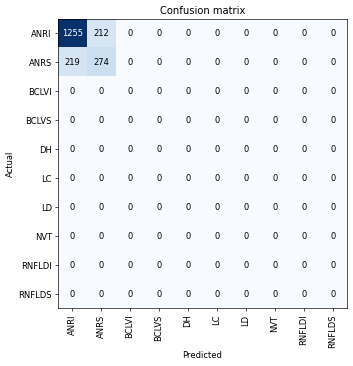

In [63]:
ClassificationInterpretation.from_learner(learn).plot_confusion_matrix(figsize=(6,6), dpi=60)

In [77]:
learn = vision_learner(dls, "convnext_tiny.in12k_ft_in1k_384", metrics=[partial(accuracy_multi, thresh=0.5)])

In [78]:
learn.fine_tune(2, 3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.954529,0.778066,0.627551,01:02


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.574283,0.581401,0.759184,01:06
1,0.552909,0.493806,0.810204,01:06


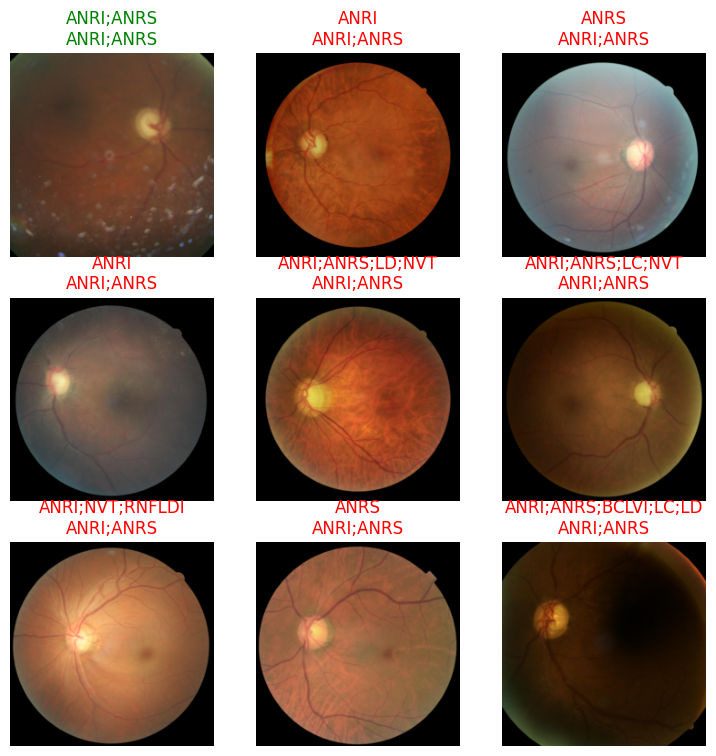

In [79]:
learn.show_results()

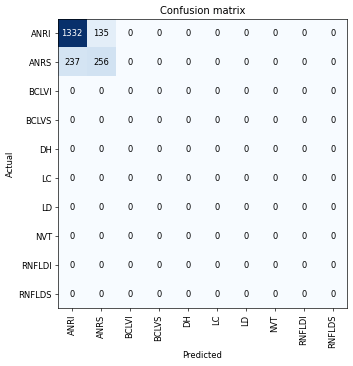

In [80]:
ClassificationInterpretation.from_learner(learn).plot_confusion_matrix(figsize=(6,6), dpi=60)

In [84]:
dls.valid